In [21]:
import tensorflow as tf
from dataset import dataset_tf
from audio import to_spectrogram_dataset
from model import get_seq_model, get_conv_model
from plots import plot_history, plot_spectrograms

In [22]:
train_ds, val_ds, label_names = dataset_tf("queenless")

Found 529 files belonging to 2 classes.
Using 424 files for training.
Using 105 files for validation.
label names: ['no_queen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Audio shape: (None, 4000, None)
Audio shape: (4000, None)
Audio shape: (None, 4000, None)
Audio shape: (4000, None)


In [23]:
train_spectrogram_ds = to_spectrogram_dataset(train_ds)
val_spectrogram_ds = to_spectrogram_dataset(val_ds)

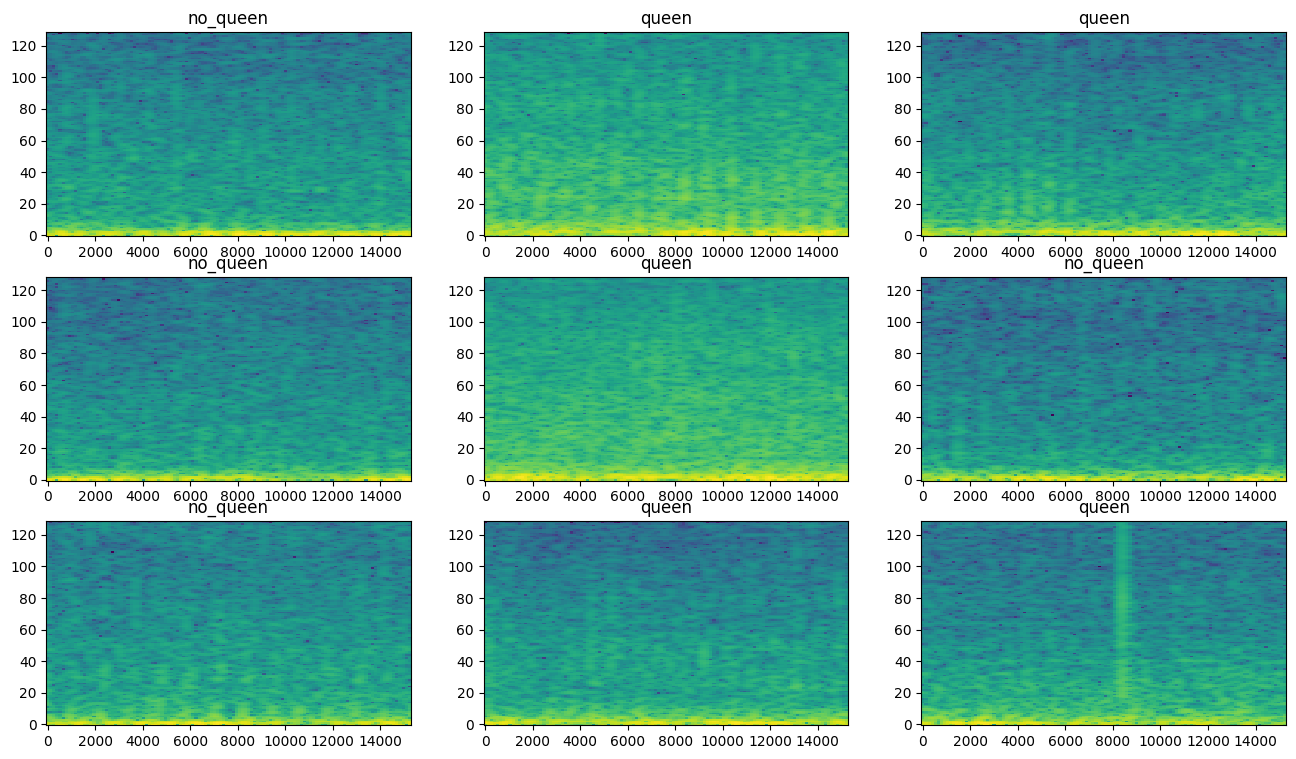

In [24]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break
# (TensorShape([118, 129, 1])
input_shape = example_spectrograms.shape[1:]
plot_spectrograms(example_spectrograms, example_spect_labels, label_names)

In [25]:
train_spectrogram_ds = train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_spectrogram_ds = val_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)

# Sequential model

In [26]:
model_seq = get_seq_model(input_shape, len(label_names), train_spectrogram_ds)
model_seq.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [27]:
history = model_seq.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=60
)

Epoch 1/60


 1/14 [=>............................] - ETA: 5s - loss: 0.6763 - accuracy: 0.5938

2024-02-26 22:46:08.889827: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


14/14 [==============================] - 1s 35ms/step - loss: 0.6807 - accuracy: 0.6321 - val_loss: 0.5333 - val_accuracy: 0.8190
Epoch 2/60
14/14 [==============================] - 0s 14ms/step - loss: 0.5346 - accuracy: 0.7311 - val_loss: 0.4813 - val_accuracy: 0.8381
Epoch 3/60
14/14 [==============================] - 0s 15ms/step - loss: 0.4410 - accuracy: 0.7759 - val_loss: 0.3825 - val_accuracy: 0.8476
Epoch 4/60
14/14 [==============================] - 0s 14ms/step - loss: 0.3251 - accuracy: 0.8467 - val_loss: 0.3049 - val_accuracy: 0.8571
Epoch 5/60
14/14 [==============================] - 0s 14ms/step - loss: 0.2451 - accuracy: 0.9033 - val_loss: 0.4961 - val_accuracy: 0.7714
Epoch 6/60
14/14 [==============================] - 0s 14ms/step - loss: 0.2598 - accuracy: 0.8892 - val_loss: 0.8854 - val_accuracy: 0.7048
Epoch 7/60
14/14 [==============================] - 0s 14ms/step - loss: 0.2816 - accuracy: 0.9104 - val_loss: 0.1998 - val_accuracy: 0.9238
Epoch 8/60
14/14 [======

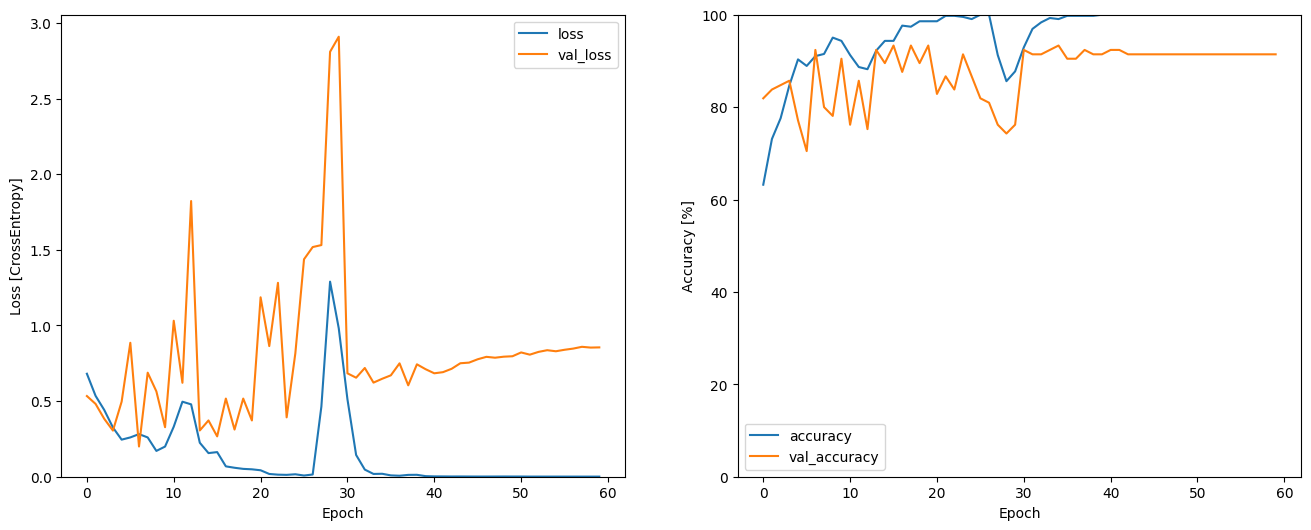

In [29]:
plot_history(history)

# Convolutional

In [30]:
model_conv = get_conv_model(input_shape, len(label_names))
model_conv.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [31]:
history = model_conv.fit(
    train_spectrogram_ds, 
    validation_data=val_spectrogram_ds, 
    epochs=60
)

Epoch 1/60
14/14 [==============================] - 1s 64ms/step - loss: 0.7251 - accuracy: 0.5755 - val_loss: 0.6849 - val_accuracy: 0.5810
Epoch 2/60
14/14 [==============================] - 0s 18ms/step - loss: 0.6511 - accuracy: 0.6085 - val_loss: 0.6130 - val_accuracy: 0.6667
Epoch 3/60
14/14 [==============================] - 0s 16ms/step - loss: 0.5485 - accuracy: 0.7217 - val_loss: 0.4257 - val_accuracy: 0.8095
Epoch 4/60
14/14 [==============================] - 0s 19ms/step - loss: 0.4040 - accuracy: 0.7995 - val_loss: 0.2992 - val_accuracy: 0.8571
Epoch 5/60
14/14 [==============================] - 0s 20ms/step - loss: 0.2934 - accuracy: 0.8797 - val_loss: 0.2326 - val_accuracy: 0.9238
Epoch 6/60
14/14 [==============================] - 0s 17ms/step - loss: 0.2125 - accuracy: 0.9104 - val_loss: 0.2262 - val_accuracy: 0.8857
Epoch 7/60
14/14 [==============================] - 0s 15ms/step - loss: 0.1902 - accuracy: 0.9387 - val_loss: 0.2582 - val_accuracy: 0.8857
Epoch 8/60
14

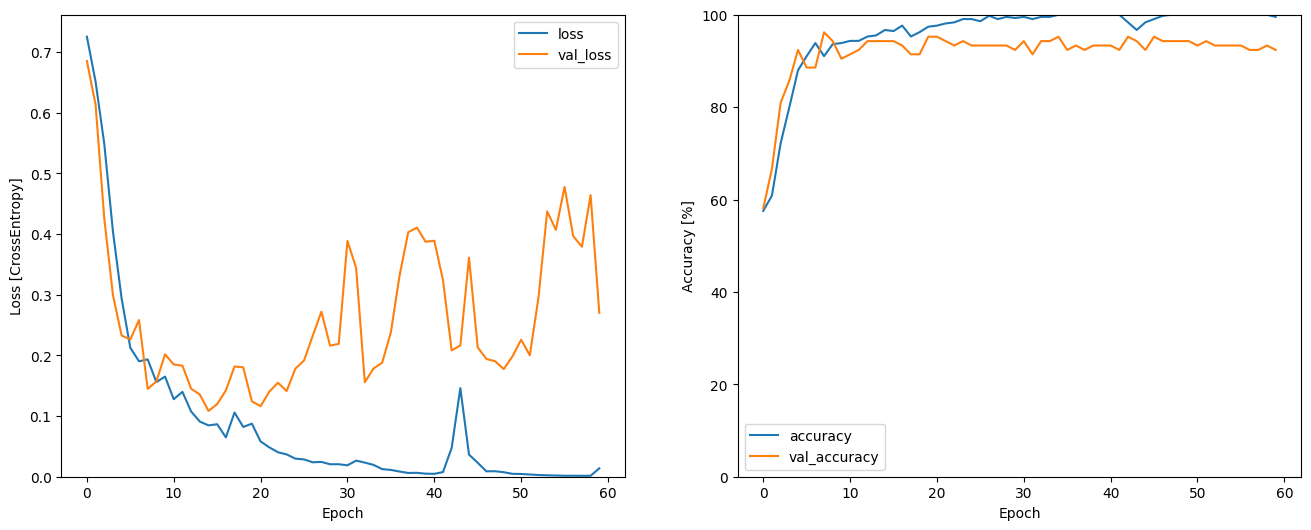

In [32]:
plot_history(history)